<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2024TeamB/blob/main/TeamB_Precise_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRECISE-BC: Exploratory Data Analysis (EDA)

This exploratory data analysis (EDA) is part of our PRECISE-BC project. It contains descriptive statistics of the synthetic patient data used and is supposed to give a brief overview.



# Importing Libraries

In [4]:
# install the newest version,
# uncomment this line in first runtime, it needs to restart runtime
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     - 17.8 MB 34.7 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=d40e9c99e97644afc4ce19bf23098ef69d2440c04365eac2ced24f4933a8fb76
  Stored in directory: /tmp/pip-ephem-wheel-cache-suxk_qh9/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c5c0909888606b4f63994766c98d2495dd57e5f7fba4aac05a8e43cc59adf0b3
  Stored in directory

In [5]:
import pandas_profiling
# pandas_profiling.version.__version__
# => 2.9.0

<ipython-input-5-6717a469f641>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [6]:
import pandas as pd
import numpy as np
import sqlite3
# from datetime import datetime
# import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# will make plot outputs appear and stored within the notebook.
%matplotlib inline

In [7]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
material_path = "/content/drive/MyDrive/WS2324_Kurs5/Material"

In [9]:
# list of datawarehoses
!ls "/content/drive/MyDrive/WS2324_Kurs5/Material"

 source_dbs					       'SQL_TeamB_Warehouse_V2_20240203.db'$'\t'
'source_dbs  SQL_TeamB_Warehouse_V2_20240203.db'$'\t'   SQL_TeamB_Warehouse_V3_20240204.db
 SQL_TeamB_Warehouse_V2_20240203.db



# Loading Data


In [10]:
# datawarehouse path
DB_DWH_PATH = f"{material_path}/SQL_TeamB_Warehouse_V3_20240204.db"

# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

In [11]:
# list of tables in db
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('F_BreastCancerQoL',), ('d_Patients',), ('d_Agegroups',), ('d_Medications',), ('d_Cancertherapy',), ('d_Comorbidity',), ('d_PrimaryTumor',)]


In [12]:
# Read sqlite query results into a pandas DataFrame
# definition age groups
df_agegroups = pd.read_sql_query("SELECT * FROM d_agegroups", dwh_conn)
# patient data
df_patients = pd.read_sql_query("SELECT * FROM d_patients", dwh_conn)
# Cancer therapy data
df_cancertherapy = pd.read_sql_query("SELECT * FROM d_cancertherapy", dwh_conn)
# Comorbidity data
df_comorbidity = pd.read_sql_query("SELECT * FROM d_comorbidity", dwh_conn)
# Medications data
df_medication = pd.read_sql_query("SELECT * FROM d_medications", dwh_conn)
# Primary Tumor data
df_primarytumor = pd.read_sql_query("SELECT * FROM d_primarytumor", dwh_conn)
# Fact table
df_breastcancer_qol = pd.read_sql_query("SELECT * FROM f_breastcancerqol", dwh_conn)


In [13]:
df_agegroups.head()

,ID,Age_group,Min_Age,Max_Age
0,1,<50,0,49
1,2,>=50,50,999


In [14]:
# Displax pandas Dataframes
df_patients.head(20)


,Id,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus
0,e536e393-3a09-e83d-9e6d-b84af4e2b97e,84,49,M
1,8417ea73-2556-9bc3-817e-964762bda4ae,51,39,M
2,d42d555a-8825-38af-e8c3-1b7f503730e9,72,59,M
3,8a79b563-d2f0-4257-e21d-3e9d8535dbf7,67,39,M
4,ebe6746e-c6ea-b204-7c45-d0d39e8dcbbe,109,55,S
5,90db0662-2d8a-72d2-6da6-340189352ed5,75,46,M
6,4c3aeb1e-e718-751a-1054-fd3e67b3e190,97,56,M
7,d72aeff7-23b0-ada3-3816-c526929756af,68,54,M
8,f76a0aef-5309-6eb1-30a4-67e20644d49d,68,45,S
9,bbd3db10-bbdb-8d43-61aa-ad2dab78459a,73,61,M


In [15]:
df_cancertherapy.head()


,ID,Description,Chemotherapy,TargetedTherapy
0,1732186,Epirubicin,1,0
1,1734919,Cyclophosphamide,1,0
2,199224,Anastrozole (AI),0,1
3,2119714,Trastuzumab (anti-HER2 antibody),0,1
4,1601380,Palbociclib (CDK4/6 inhibitor),0,1


In [16]:
df_comorbidity.head()


,ID,Description
0,53741008,Coronary Heart Disease
1,49436004,Atrial Fibrillation
2,410429000,Cardiac Arrest
3,429007001,History of cardiac arrest (situation)
4,230690007,Stroke


In [17]:
df_medication.head()


,ID,Description
0,309362,Clopidogrel
1,312961,Simvastatin
2,197361,Amlodipine
3,705129,Nitroglycerin
4,855332,Warfarin


In [18]:
df_primarytumor.head()

,ID,HER2_Status,HR_Status,Stage,Nodal_Status,T_Status,M_Status
0,447021b4-edd1-7f13-182f-0907071c54e7,Negative (qualifier value),None,Stage 3A (qualifier value),N1 category (finding),T3 category (finding),M0 category (finding)
1,477936e3-f007-9562-d971-47fce9cd008b,Negative (qualifier value),Positive (qualifier value),Stage 3C (qualifier value),N3 category (finding),T1 category (finding),M0 category (finding)
2,baf91a64-6d44-cffe-62a2-9ce872fff2a0,Negative (qualifier value),None,Stage 2A (qualifier value),N0 category (finding),T2 category (finding),M0 category (finding)
3,e326cfc8-7924-8075-c201-98bfa9407f4e,None,None,Stage 2A (qualifier value),None,None,None
4,fbc75bf8-eeb8-669a-b2eb-cca6d6b4486f,Positive (qualifier value),Positive (qualifier value),Stage 3C (qualifier value),N3 category (finding),T1 category (finding),M0 category (finding)


In [19]:
df_breastcancer_qol.head()

,PatientId,Age_group_diagnosis_ID,Primary_Tumor_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last
0,e536e393-3a09-e83d-9e6d-b84af4e2b97e,1,None,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,0.9
1,8417ea73-2556-9bc3-817e-964762bda4ae,1,fbc75bf8-eeb8-669a-b2eb-cca6d6b4486f,NaN,0,nonhispanic,F,199224.0,0.0,1.0,None,0,1.0,0.8
2,8417ea73-2556-9bc3-817e-964762bda4ae,1,fbc75bf8-eeb8-669a-b2eb-cca6d6b4486f,NaN,0,nonhispanic,F,1601380.0,0.0,1.0,None,0,1.0,0.8
3,8417ea73-2556-9bc3-817e-964762bda4ae,1,fbc75bf8-eeb8-669a-b2eb-cca6d6b4486f,NaN,0,nonhispanic,F,1732186.0,1.0,0.0,None,0,1.0,0.8
4,8417ea73-2556-9bc3-817e-964762bda4ae,1,fbc75bf8-eeb8-669a-b2eb-cca6d6b4486f,NaN,0,nonhispanic,F,1734919.0,1.0,0.0,None,0,1.0,0.8


In [20]:
# close db connection
# dwh_conn.close()

# **Anonymization/pseudonomyzation of patient data**
In this step, we will anonymize/pseudonymize patient data by substituting patient ID as well as primary tumor ID by a running number


In [21]:
# Anonymization of patient ID (Assignment of a running number starting with 1)
unique_ids = df_breastcancer_qol['PatientId'].unique()
anonymized_ids = range(1, len(unique_ids) + 1)
id_map = dict(zip(unique_ids, anonymized_ids))


df_breastcancer_qol['PatientId'] = df_breastcancer_qol['PatientId'].map(id_map)

In [22]:
unique_ids = df_patients['Id'].unique()
anonymized_ids = range(1, len(unique_ids) + 1)
id_map = dict(zip(unique_ids, anonymized_ids))


df_patients['Id'] = df_patients['Id'].map(id_map)
df_patients.head()

,Id,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus
0,1,84,49,M
1,2,51,39,M
2,3,72,59,M
3,4,67,39,M
4,5,109,55,S


In [23]:
# Anonymization of primary tumor ID (Assignment of a running number starting with 1)
unique_ids = df_breastcancer_qol['Primary_Tumor_ID'].unique()
anonymized_ids = range(1, len(unique_ids) + 1)
id_map = dict(zip(unique_ids, anonymized_ids))


df_breastcancer_qol['Primary_Tumor_ID'] = df_breastcancer_qol['Primary_Tumor_ID'].map(id_map)

In [24]:
df_breastcancer_qol.head(25)

,PatientId,Age_group_diagnosis_ID,Primary_Tumor_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last
0,1,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,0.9
1,2,1,2,NaN,0,nonhispanic,F,199224.0,0.0,1.0,None,0,1.0,0.8
2,2,1,2,NaN,0,nonhispanic,F,1601380.0,0.0,1.0,None,0,1.0,0.8
3,2,1,2,NaN,0,nonhispanic,F,1732186.0,1.0,0.0,None,0,1.0,0.8
4,2,1,2,NaN,0,nonhispanic,F,1734919.0,1.0,0.0,None,0,1.0,0.8
5,2,1,2,NaN,0,nonhispanic,F,2119714.0,0.0,1.0,None,0,1.0,0.8
6,3,2,3,49436004.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7
7,3,2,3,230690007.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7
8,4,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.8,0.8
9,5,2,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,1.0


# Understanding Data/Basic Data Exploration
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

* the shape of the dataset
* info of the dataset
* summary of the dataset
* (n)unique values for each variable

In [25]:
#size of dataset
df = df_breastcancer_qol
df.shape

(20, 14)

In [26]:
# .columns returns the name of all of your columns in the dataset.
df.columns

Index(['PatientId', 'Age_group_diagnosis_ID', 'Primary_Tumor_ID',
       'Comorbidity_ID', 'Comorbidity_YesNo', 'Ethnicity', 'Gender',
       'Cancertherapy_ID', 'Chemotherapy_YesNo', 'Targetedtherapy_YesNo',
       'Medication_ID', 'Medication_YesNo', 'QoL_Value_first',
       'QoL_Value_last'],
      dtype='object')

In [27]:
# attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientId               20 non-null     int64  
 1   Age_group_diagnosis_ID  20 non-null     int64  
 2   Primary_Tumor_ID        20 non-null     int64  
 3   Comorbidity_ID          6 non-null      float64
 4   Comorbidity_YesNo       20 non-null     int64  
 5   Ethnicity               20 non-null     object 
 6   Gender                  20 non-null     object 
 7   Cancertherapy_ID        13 non-null     float64
 8   Chemotherapy_YesNo      13 non-null     float64
 9   Targetedtherapy_YesNo   13 non-null     float64
 10  Medication_ID           0 non-null      object 
 11  Medication_YesNo        20 non-null     int64  
 12  QoL_Value_first         17 non-null     float64
 13  QoL_Value_last          17 non-null     float64
dtypes: float64(6), int64(5), object(3)
memory us

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [28]:
# .describe summarizes the count, mean, standard deviation, min, and max for numerical variables.
df.describe()

,PatientId,Age_group_diagnosis_ID,Primary_Tumor_ID,Comorbidity_ID,Comorbidity_YesNo,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_YesNo,QoL_Value_first,QoL_Value_last
count,20.000000,20.000000,20.000000,6.000000e+00,20.000000,1.300000e+01,13.000000,13.000000,20.0,17.000000,17.000000
mean,5.200000,1.400000,2.550000,1.098540e+08,0.300000,1.031601e+06,0.461538,0.538462,0.0,0.905882,0.811765
std,3.036619,0.502625,1.605091,9.359916e+07,0.470162,7.747081e+05,0.518875,0.518875,0.0,0.096635,0.085749
min,1.000000,1.000000,1.000000,4.943600e+07,0.000000,1.982400e+05,0.000000,0.000000,0.0,0.800000,0.700000
25%,2.000000,1.000000,1.000000,4.943600e+07,0.000000,1.992240e+05,0.000000,0.000000,0.0,0.800000,0.800000
50%,5.500000,1.000000,2.000000,4.943600e+07,0.000000,5.832140e+05,0.000000,1.000000,0.0,0.900000,0.800000
75%,7.250000,2.000000,4.000000,1.853765e+08,1.000000,1.732186e+06,1.000000,1.000000,0.0,1.000000,0.900000
max,11.000000,2.000000,6.000000,2.306900e+08,1.000000,2.119714e+06,1.000000,1.000000,0.0,1.000000,1.000000


In [29]:
# .nunique(axis=0) returns the number of unique values for each variable.
df.nunique(axis=0)


PatientId                 11
Age_group_diagnosis_ID     2
Primary_Tumor_ID           6
Comorbidity_ID             2
Comorbidity_YesNo          2
Ethnicity                  2
Gender                     2
Cancertherapy_ID           8
Chemotherapy_YesNo         2
Targetedtherapy_YesNo      2
Medication_ID              0
Medication_YesNo           1
QoL_Value_first            3
QoL_Value_last             4
dtype: int64

In [30]:
# replacing blank values (with space) with NAN
df = df.replace(r'^\s*$', np.nan, regex=True)


In [31]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Univariate Analysis

## Descriptive Statistics

In [32]:
# number of patients in procedure table
df.groupby(["PatientId"]).size()

PatientId
1     1
2     5
3     2
4     1
5     1
6     3
7     2
8     2
9     1
10    1
11    1
dtype: int64

For some patients, there ist more than one observation.

<Axes: ylabel='Frequency'>

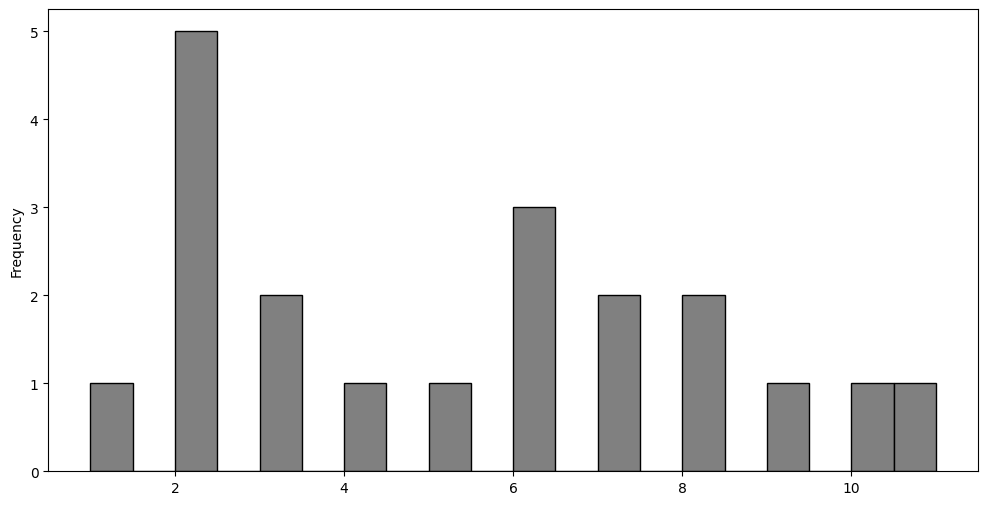

In [33]:
df["PatientId"].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

In [34]:
df.groupby(["Comorbidity_ID"]).size()

Comorbidity_ID
49436004.0     4
230690007.0    2
dtype: int64

In [35]:
# Identifying patients with comorbidities and identifying the kind of comorbidity

comorbidity_counts = df.groupby('PatientId')['Comorbidity_ID'].value_counts()

comorbidity_counts_df = comorbidity_counts.reset_index(name='Count')

merged_df = pd.merge(comorbidity_counts_df, df_comorbidity, left_on='Comorbidity_ID', right_on='ID', how='left')

merged_df = merged_df.drop('ID', axis=1)

print(merged_df)




   PatientId  Comorbidity_ID  Count          Description
0          3      49436004.0      1  Atrial Fibrillation
1          3     230690007.0      1               Stroke
2          7      49436004.0      1  Atrial Fibrillation
3          7     230690007.0      1               Stroke
4          8      49436004.0      2  Atrial Fibrillation


Only three of our eleven patients suffered from comorbidities: patient #3 and patient #7 both had AF as well as a Stroke, patient #8 had atrial fibrillation

In [36]:
# Identifying frequency of different chemotherapy regimen

chemo_counts = df.groupby('Cancertherapy_ID').size()

chemo_counts_df = chemo_counts.reset_index(name='Count')

merged2_df = pd.merge(chemo_counts_df, df_cancertherapy, left_on='Cancertherapy_ID', right_on='ID', how='left')

merged2_df = merged2_df.drop(['ID', 'Chemotherapy', 'TargetedTherapy'], axis=1)

print(merged2_df)

   Cancertherapy_ID  Count                       Description
0          198240.0      3                  Tamoxifen (SERM)
1          199224.0      1                  Anastrozole (AI)
2          583214.0      3                        Paclitaxel
3         1601380.0      1    Palbociclib (CDK4/6 inhibitor)
4         1732186.0      2                        Epirubicin
5         1734919.0      1                  Cyclophosphamide
6         1946840.0      1    Abemaciclib (CDK4/6 inhibitor)
7         2119714.0      1  Trastuzumab (anti-HER2 antibody)


In [37]:
# Identifying different chemotherapy regimen for each patient

chemo_counts = df.groupby('PatientId')['Cancertherapy_ID'].value_counts()

chemo_counts_df = chemo_counts.reset_index(name='Count')

merged3_df = pd.merge(chemo_counts_df, df_cancertherapy, left_on='Cancertherapy_ID', right_on='ID', how='left')

merged3_df = merged3_df.drop(['ID', 'Chemotherapy', 'TargetedTherapy'], axis=1)

print(merged3_df)


    PatientId  Cancertherapy_ID  Count                       Description
0           2          199224.0      1                  Anastrozole (AI)
1           2         1601380.0      1    Palbociclib (CDK4/6 inhibitor)
2           2         1732186.0      1                        Epirubicin
3           2         1734919.0      1                  Cyclophosphamide
4           2         2119714.0      1  Trastuzumab (anti-HER2 antibody)
5           3          583214.0      2                        Paclitaxel
6           6          198240.0      1                  Tamoxifen (SERM)
7           6         1732186.0      1                        Epirubicin
8           6         1946840.0      1    Abemaciclib (CDK4/6 inhibitor)
9           8          198240.0      1                  Tamoxifen (SERM)
10          8          583214.0      1                        Paclitaxel
11         10          198240.0      1                  Tamoxifen (SERM)


In [38]:
grouped_df = merged3_df.groupby('PatientId')['Count'].sum()

grouped_df = grouped_df.reset_index()

print(grouped_df)


   PatientId  Count
0          2      5
1          3      2
2          6      3
3          8      2
4         10      1


We only have information about the cancertherapy regimen of five out of 11 patients (patient # 2, #3, #6, #8, #10).


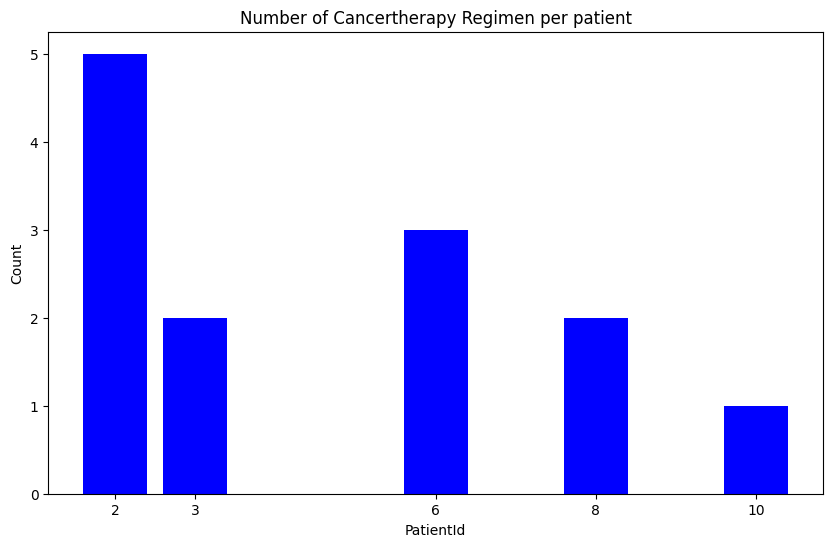

In [39]:
plt.figure(figsize=(10,6))
plt.bar(grouped_df['PatientId'], grouped_df['Count'], color='blue')
plt.xlabel('PatientId')
plt.ylabel('Count')
plt.title('Number of Cancertherapy Regimen per patient')
plt.xticks(grouped_df['PatientId'])
plt.show()



In [40]:
# Identifying frequency of additional medication

med_counts = df.groupby('PatientId')['Medication_ID'].value_counts()

med_counts_df = med_counts.reset_index(name='Count')

merged4_df = pd.merge(med_counts_df, df_medication, left_on='Medication_ID', right_on='ID', how='left')

merged4_df = merged4_df.drop(['ID'], axis=1)

print(merged4_df)

Empty DataFrame
Columns: [PatientId, Medication_ID, Count, Description]
Index: []


Non of our patients was on additional medication

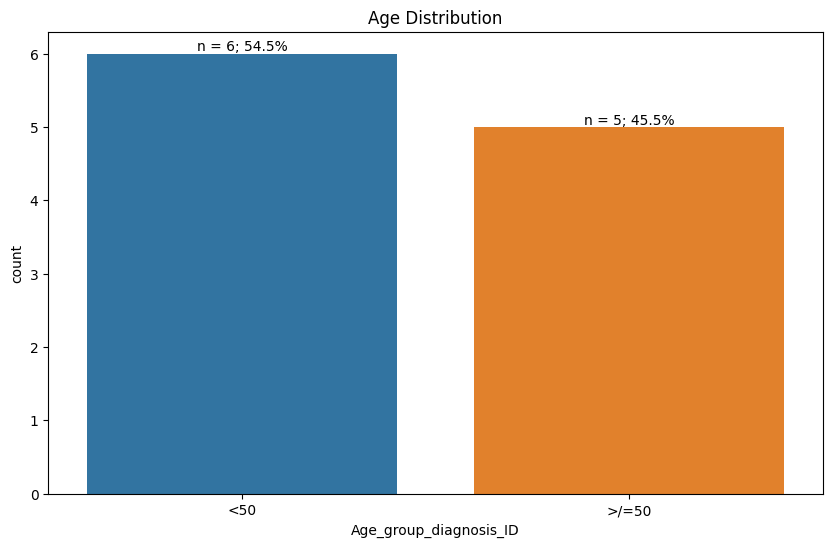

In [41]:
grouped_df = df.groupby('PatientId').first()

# Age
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_group_diagnosis_ID', data=grouped_df)
plt.title('Age Distribution')
ax.set_xticklabels(['<50', '>/=50'])
total = len(grouped_df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    text = f'n = {count}; {percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')
plt.show()

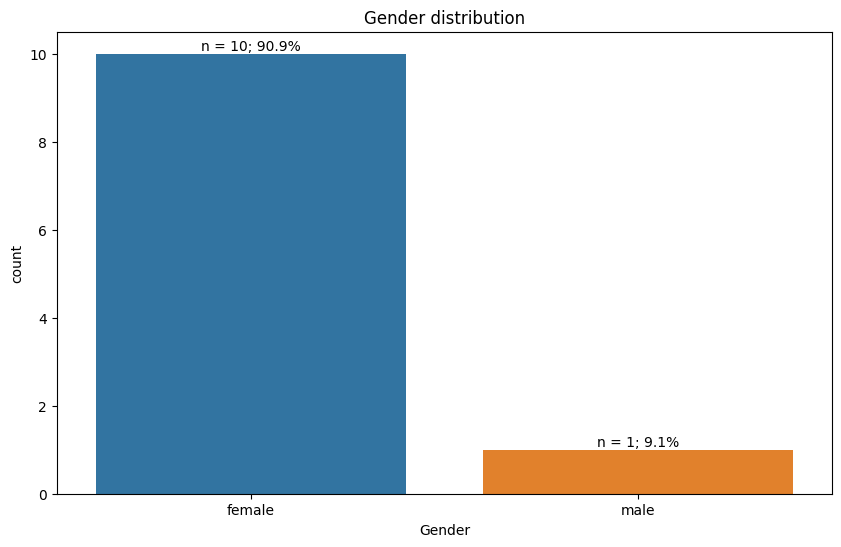

In [42]:
# Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=grouped_df)
plt.title('Gender distribution')
ax.set_xticklabels(['female', 'male'])
total = len(grouped_df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    text = f'n = {count}; {percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')
plt.show()

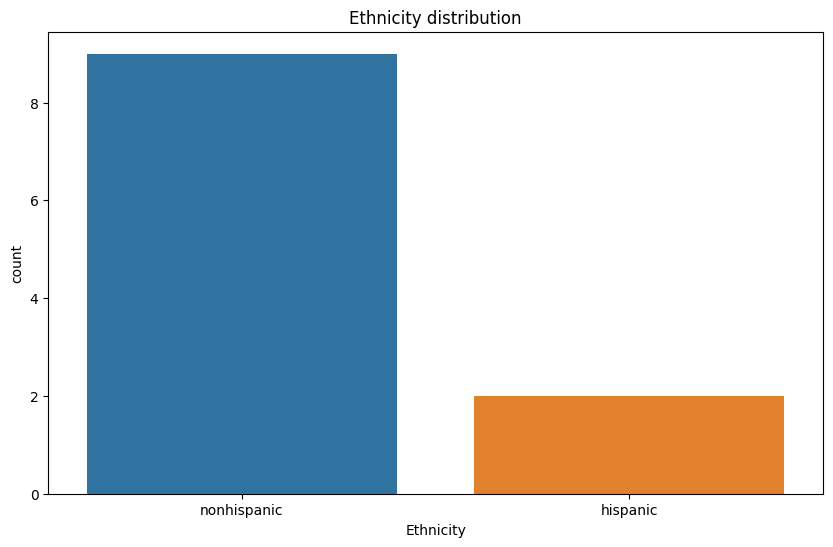

In [43]:
# Ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', data=grouped_df)
plt.title('Ethnicity distribution')
total = len(grouped_df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    text = f'n = {count}; {percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')
plt.show()

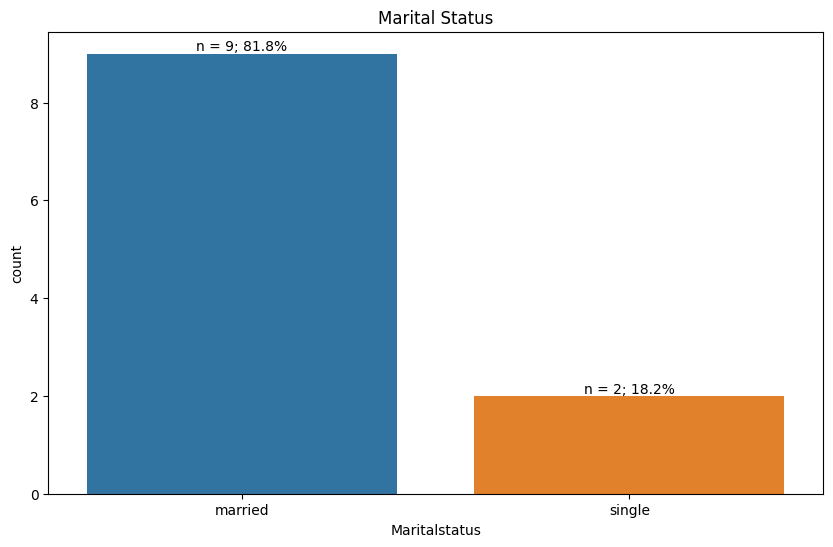

In [44]:
#  Marital Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Maritalstatus', data=df_patients)
plt.title('Marital Status')
ax.set_xticklabels(['married', 'single'])
total = len(df_patients)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    text = f'n = {count}; {percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')
plt.show()


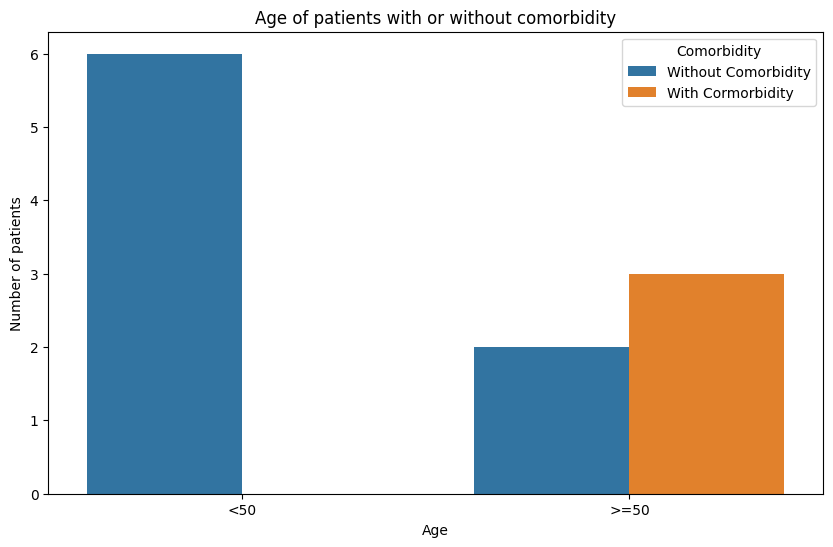

In [45]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_group_diagnosis_ID', hue='Comorbidity_YesNo', data=grouped_df)
plt.title('Age of patients with or without comorbidity')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.xticks([0, 1], ['<50', '>=50'])
plt.legend(title='Comorbidity', labels=['Without Comorbidity', 'With Cormorbidity'])


plt.show()


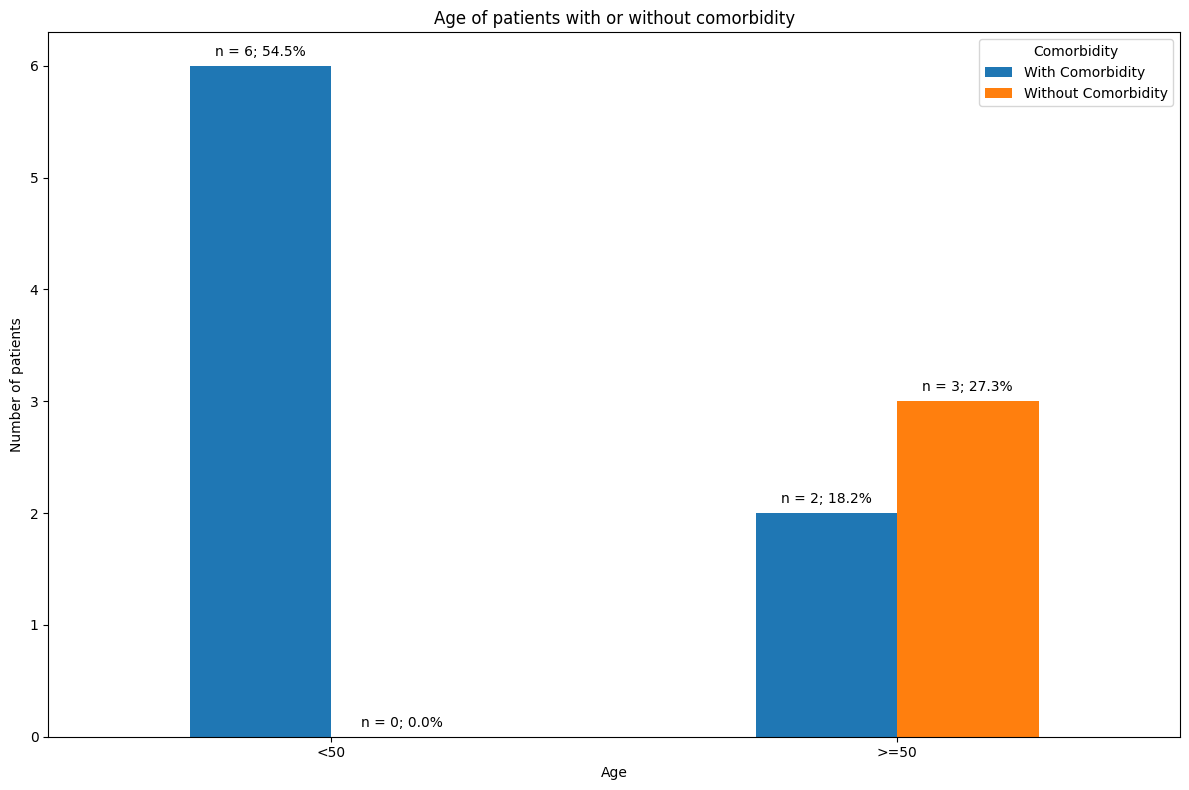

In [46]:

fig, ax = plt.subplots(figsize=(12, 8))


data = grouped_df.groupby(['Age_group_diagnosis_ID', 'Comorbidity_YesNo']).size().unstack(fill_value=0)
data.plot(kind='bar', ax=ax)

data.index = ['<50', '>=50']
ax.set_title('Age of patients with or without comorbidity')
ax.set_xlabel('Age')
ax.set_ylabel('Number of patients')
ax.set_xticklabels(data.index, rotation=0)

total = grouped_df.shape[0]


for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    text = f'n = {height}; {percentage:.1f}%'
    ax.annotate(text, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Comorbidity', labels=['With Comorbidity', 'Without Comorbidity'])
plt.tight_layout()
plt.show()

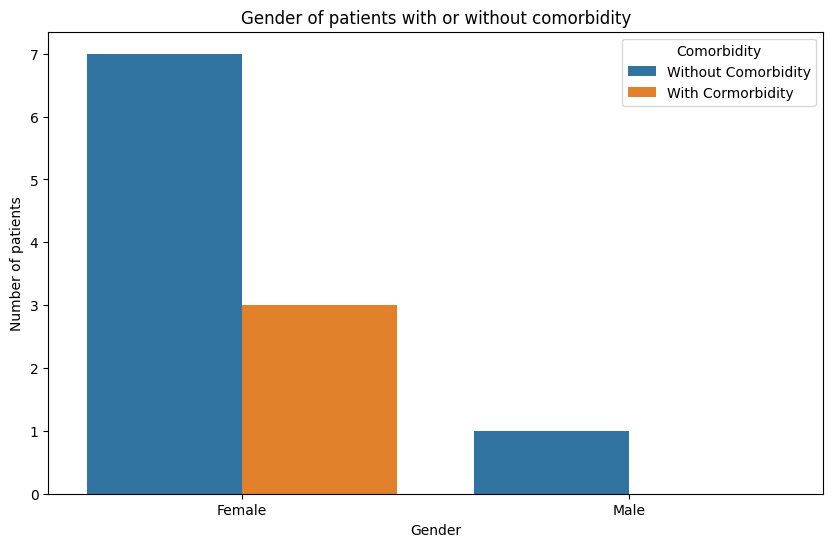

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Comorbidity_YesNo', data=grouped_df)
plt.title('Gender of patients with or without comorbidity')
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Comorbidity', labels=['Without Comorbidity', 'With Cormorbidity'])
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    text = f'n = {count}; {percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')
plt.show()

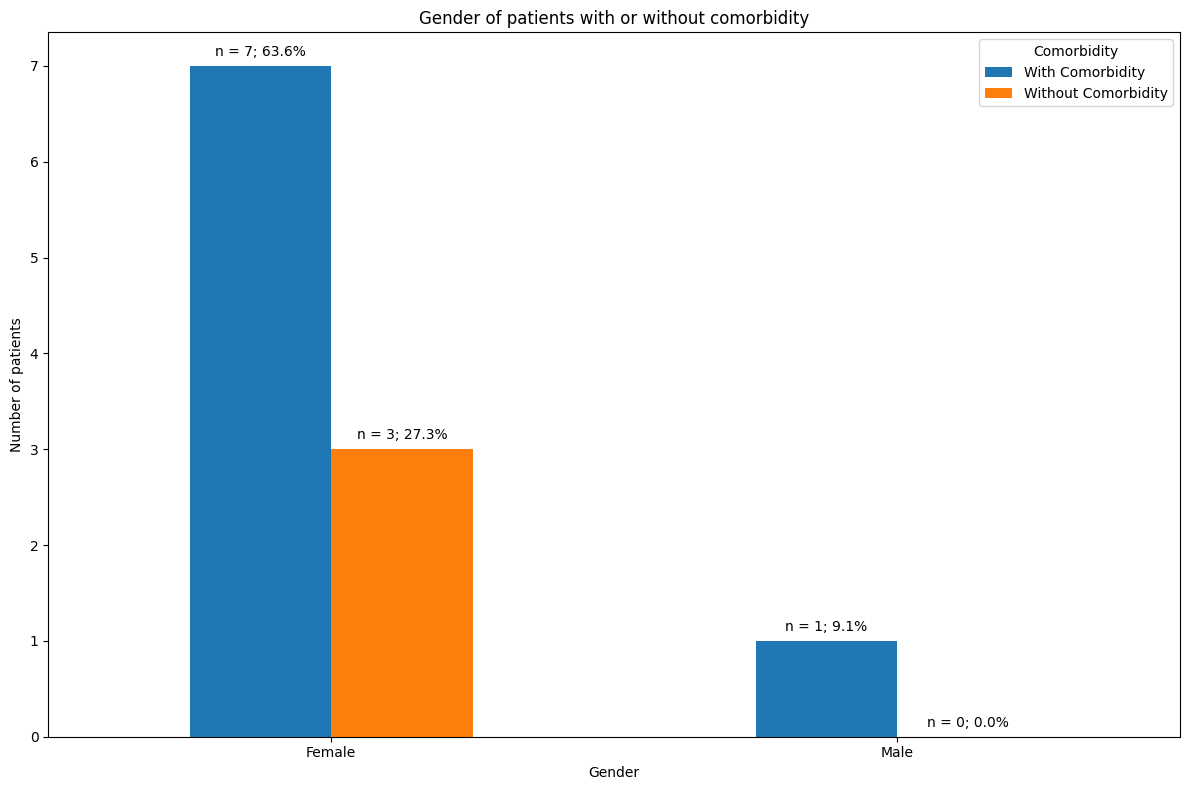

In [48]:

fig, ax = plt.subplots(figsize=(12, 8))


data = grouped_df.groupby(['Gender', 'Comorbidity_YesNo']).size().unstack(fill_value=0)
data.plot(kind='bar', ax=ax)

data.index = ['Female', 'Male']
ax.set_title('Gender of patients with or without comorbidity')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of patients')
ax.set_xticklabels(data.index, rotation=0)

total = grouped_df.shape[0]


for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    text = f'n = {height}; {percentage:.1f}%'
    ax.annotate(text, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Comorbidity', labels=['With Comorbidity', 'Without Comorbidity'])
plt.tight_layout()
plt.show()

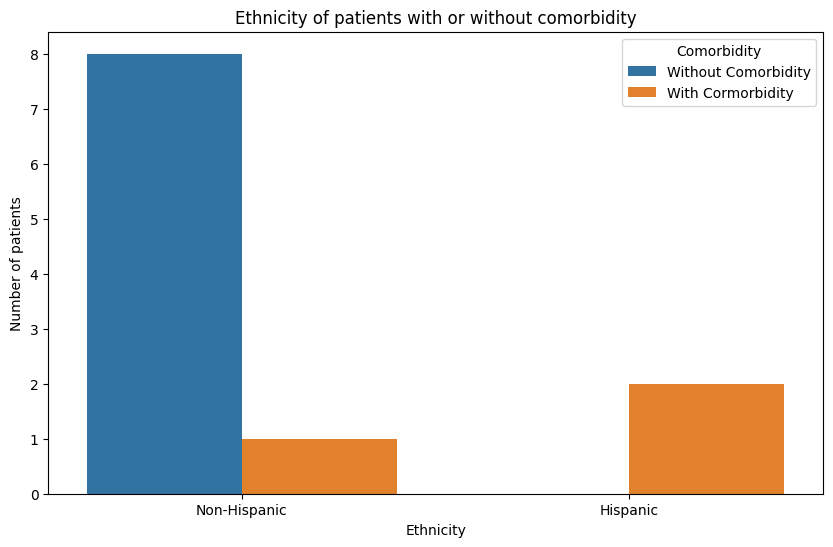

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='Comorbidity_YesNo', data=grouped_df)
plt.title('Ethnicity of patients with or without comorbidity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of patients')
plt.xticks([0, 1], ['Non-Hispanic', 'Hispanic'])
plt.legend(title='Comorbidity', labels=['Without Comorbidity', 'With Cormorbidity'])
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    text = f'n = {count}; {percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')
plt.show()

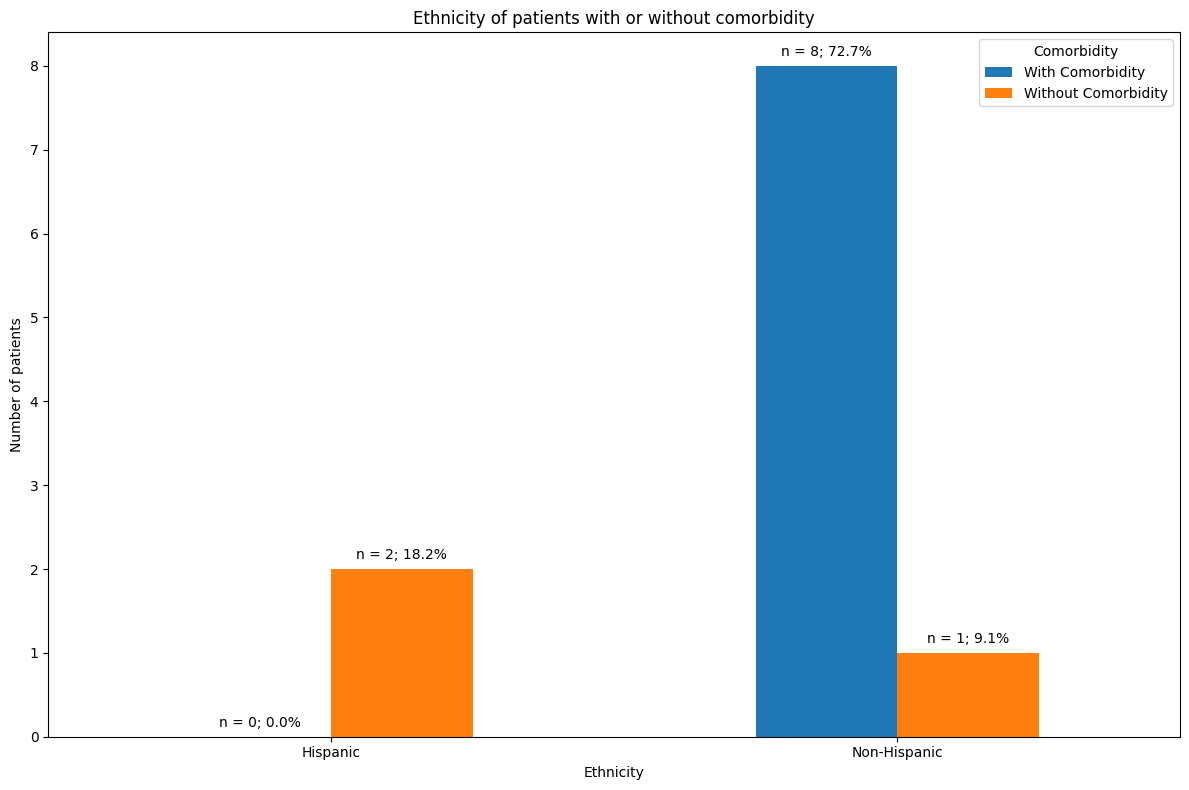

In [50]:

fig, ax = plt.subplots(figsize=(12, 8))


data = grouped_df.groupby(['Ethnicity', 'Comorbidity_YesNo']).size().unstack(fill_value=0)
data.plot(kind='bar', ax=ax)

data.index = ['Hispanic', 'Non-Hispanic']
ax.set_title('Ethnicity of patients with or without comorbidity')
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Number of patients')
ax.set_xticklabels(data.index, rotation=0)

total = grouped_df.shape[0]


for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    text = f'n = {height}; {percentage:.1f}%'
    ax.annotate(text, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Comorbidity', labels=['With Comorbidity', 'Without Comorbidity'])
plt.tight_layout()
plt.show()

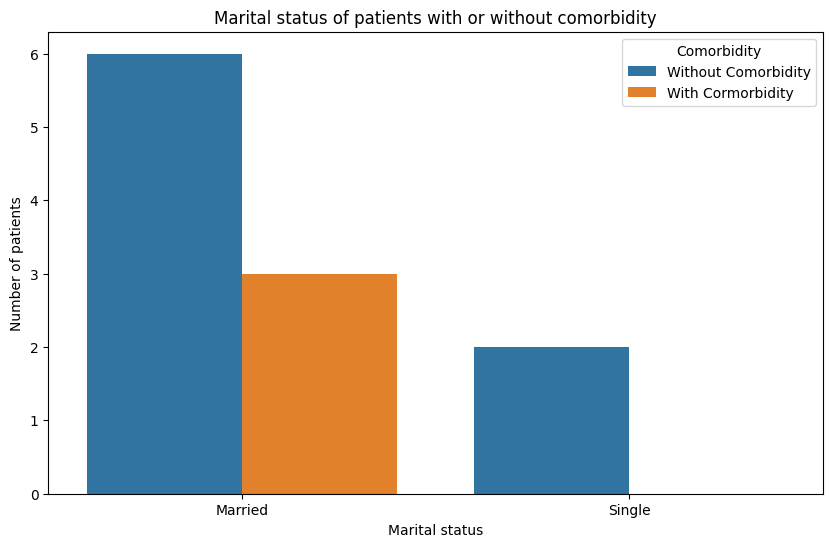

In [51]:
merged_df5 = pd.merge(df_patients, df_breastcancer_qol, left_on='Id', right_on='PatientId', how='inner')
grouped_df5 = merged_df5.groupby('PatientId').first()

plt.figure(figsize=(10, 6))
sns.countplot(x='Maritalstatus', hue='Comorbidity_YesNo', data=grouped_df5)
plt.title('Marital status of patients with or without comorbidity')
plt.xlabel('Marital status')
plt.ylabel('Number of patients')
plt.xticks([0, 1], ['Married', 'Single'])
plt.legend(title='Comorbidity', labels=['Without Comorbidity', 'With Cormorbidity'])
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    text = f'n = {count}; {percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')
plt.show()

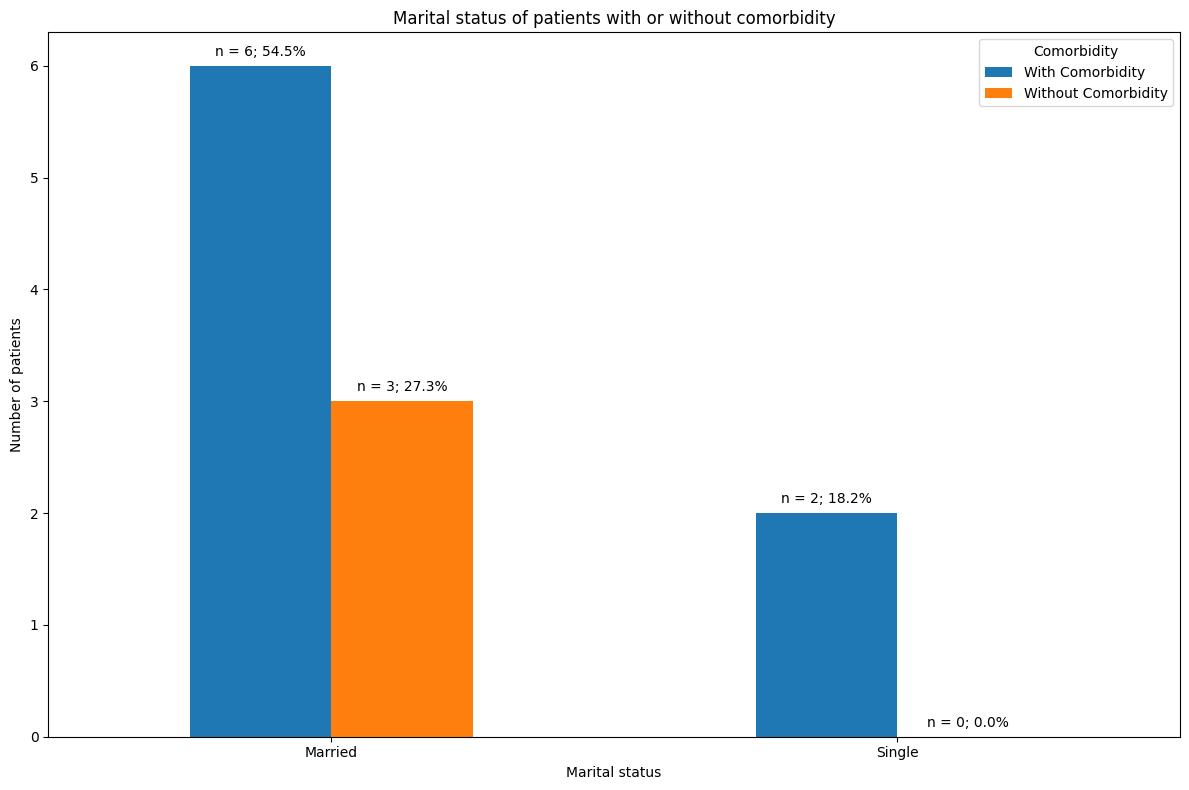

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))


data = grouped_df5.groupby(['Maritalstatus', 'Comorbidity_YesNo']).size().unstack(fill_value=0)
data.plot(kind='bar', ax=ax)

data.index = ['Married', 'Single']
ax.set_title('Marital status of patients with or without comorbidity')
ax.set_xlabel('Marital status')
ax.set_ylabel('Number of patients')
ax.set_xticklabels(data.index, rotation=0)

total = grouped_df5.shape[0]


for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    text = f'n = {height}; {percentage:.1f}%'
    ax.annotate(text, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Comorbidity', labels=['With Comorbidity', 'Without Comorbidity'])
plt.tight_layout()
plt.show()

## Inferential statistics

In [53]:

df = df_breastcancer_qol

In [54]:
print(df.columns)

Index(['PatientId', 'Age_group_diagnosis_ID', 'Primary_Tumor_ID',
       'Comorbidity_ID', 'Comorbidity_YesNo', 'Ethnicity', 'Gender',
       'Cancertherapy_ID', 'Chemotherapy_YesNo', 'Targetedtherapy_YesNo',
       'Medication_ID', 'Medication_YesNo', 'QoL_Value_first',
       'QoL_Value_last'],
      dtype='object')


In [55]:
df.head(30)

,PatientId,Age_group_diagnosis_ID,Primary_Tumor_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last
0,1,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,0.9
1,2,1,2,NaN,0,nonhispanic,F,199224.0,0.0,1.0,None,0,1.0,0.8
2,2,1,2,NaN,0,nonhispanic,F,1601380.0,0.0,1.0,None,0,1.0,0.8
3,2,1,2,NaN,0,nonhispanic,F,1732186.0,1.0,0.0,None,0,1.0,0.8
4,2,1,2,NaN,0,nonhispanic,F,1734919.0,1.0,0.0,None,0,1.0,0.8
5,2,1,2,NaN,0,nonhispanic,F,2119714.0,0.0,1.0,None,0,1.0,0.8
6,3,2,3,49436004.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7
7,3,2,3,230690007.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7
8,4,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.8,0.8
9,5,2,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,1.0


In [56]:
df['qol_difference'] = df['QoL_Value_last'] - df['QoL_Value_first']

df.head(30)


,PatientId,Age_group_diagnosis_ID,Primary_Tumor_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,qol_difference
0,1,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,0.9,0.0
1,2,1,2,NaN,0,nonhispanic,F,199224.0,0.0,1.0,None,0,1.0,0.8,-0.2
2,2,1,2,NaN,0,nonhispanic,F,1601380.0,0.0,1.0,None,0,1.0,0.8,-0.2
3,2,1,2,NaN,0,nonhispanic,F,1732186.0,1.0,0.0,None,0,1.0,0.8,-0.2
4,2,1,2,NaN,0,nonhispanic,F,1734919.0,1.0,0.0,None,0,1.0,0.8,-0.2
5,2,1,2,NaN,0,nonhispanic,F,2119714.0,0.0,1.0,None,0,1.0,0.8,-0.2
6,3,2,3,49436004.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7,-0.3
7,3,2,3,230690007.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7,-0.3
8,4,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.8,0.8,0.0
9,5,2,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,1.0,0.1


In [60]:
df = pd.merge(df, df_patients[['Id', 'Maritalstatus']], left_on='PatientId', right_on='Id', how='left')


df.drop('Id', axis=1, inplace=True)
df.drop('Maritalstatus_x', axis=1, inplace=True)





In [61]:
df.head(30)

,PatientId,Age_group_diagnosis_ID,Primary_Tumor_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,qol_difference,Maritalstatus_y,Maritalstatus
0,1,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,0.9,0.0,M,M
1,2,1,2,NaN,0,nonhispanic,F,199224.0,0.0,1.0,None,0,1.0,0.8,-0.2,M,M
2,2,1,2,NaN,0,nonhispanic,F,1601380.0,0.0,1.0,None,0,1.0,0.8,-0.2,M,M
3,2,1,2,NaN,0,nonhispanic,F,1732186.0,1.0,0.0,None,0,1.0,0.8,-0.2,M,M
4,2,1,2,NaN,0,nonhispanic,F,1734919.0,1.0,0.0,None,0,1.0,0.8,-0.2,M,M
5,2,1,2,NaN,0,nonhispanic,F,2119714.0,0.0,1.0,None,0,1.0,0.8,-0.2,M,M
6,3,2,3,49436004.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7,-0.3,M,M
7,3,2,3,230690007.0,1,hispanic,F,583214.0,1.0,0.0,None,0,1.0,0.7,-0.3,M,M
8,4,1,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.8,0.8,0.0,M,M
9,5,2,1,NaN,0,nonhispanic,F,NaN,NaN,NaN,None,0,0.9,1.0,0.1,S,S


In [62]:
df_unique = df.drop_duplicates(subset='PatientId')
df_unique = df_unique.dropna(subset=['QoL_Value_first'])

In [63]:
from scipy import stats

def calculate_stats_and_mannwhitneyu(group1, group2):
    mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
    mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    return (mean1, std1, mean2, std2, u_stat, p_value)


metrics_1 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Comorbidity_YesNo'] == 1]['QoL_Value_first'], df_unique[df_unique['Comorbidity_YesNo'] == 0]['QoL_Value_first'])
metrics_2 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Comorbidity_YesNo'] == 1]['QoL_Value_last'], df_unique[df_unique['Comorbidity_YesNo'] == 0]['QoL_Value_last'])
metrics_3 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Comorbidity_YesNo'] == 1]['qol_difference'], df_unique[df_unique['Comorbidity_YesNo'] == 0]['qol_difference'])


for i, metrics in enumerate([metrics_1, metrics_2, metrics_3], start=1):
    category = ["First QoL", "Last QoL", "QoL Difference"][i-1]
    status_a, status_b = "with Comorbidity", "without Comorbidity"
    print(f"{category} - {status_a}: Mittelwert = {metrics[0]:.2f}, Standardabweichung = {metrics[1]:.2f}")
    print(f"{category} - {status_b}: Mittelwert = {metrics[2]:.2f}, Standardabweichung = {metrics[3]:.2f}")
    print(f"Mann-Whitney U Statistik = {metrics[4]:.3f}, p-Wert = {metrics[5]:.3f}\n")


First QoL - with Comorbidity: Mittelwert = 0.87, Standardabweichung = 0.12
First QoL - without Comorbidity: Mittelwert = 0.89, Standardabweichung = 0.09
Mann-Whitney U Statistik = 9.000, p-Wert = 0.805

Last QoL - with Comorbidity: Mittelwert = 0.77, Standardabweichung = 0.12
Last QoL - without Comorbidity: Mittelwert = 0.86, Standardabweichung = 0.08
Mann-Whitney U Statistik = 5.000, p-Wert = 0.232

QoL Difference - with Comorbidity: Mittelwert = -0.10, Standardabweichung = 0.20
QoL Difference - without Comorbidity: Mittelwert = -0.03, Standardabweichung = 0.10
Mann-Whitney U Statistik = 7.500, p-Wert = 0.555



In [64]:
# Age
def calculate_stats_and_mannwhitneyu(group1, group2):
    mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
    mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    return (mean1, std1, mean2, std2, u_stat, p_value)


metrics_1 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Age_group_diagnosis_ID'] == 2]['QoL_Value_first'], df_unique[df_unique['Age_group_diagnosis_ID'] == 1]['QoL_Value_first'])
metrics_2 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Age_group_diagnosis_ID'] == 2]['QoL_Value_last'], df_unique[df_unique['Age_group_diagnosis_ID'] == 1]['QoL_Value_last'])
metrics_3 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Age_group_diagnosis_ID'] == 2]['qol_difference'], df_unique[df_unique['Age_group_diagnosis_ID'] == 1]['qol_difference'])


for i, metrics in enumerate([metrics_1, metrics_2, metrics_3], start=1):
    category = ["First QoL", "Last QoL", "QoL Difference"][i-1]
    status_a, status_b = "Age >=50", "Age <50"
    print(f"{category} - {status_a}: Mittelwert = {metrics[0]:.2f}, Standardabweichung = {metrics[1]:.2f}")
    print(f"{category} - {status_b}: Mittelwert = {metrics[2]:.2f}, Standardabweichung = {metrics[3]:.2f}")
    print(f"Mann-Whitney U Statistik = {metrics[4]:.3f}, p-Wert = {metrics[5]:.3f}\n")

First QoL - Age >=50: Mittelwert = 0.90, Standardabweichung = 0.10
First QoL - Age <50: Mittelwert = 0.86, Standardabweichung = 0.09
Mann-Whitney U Statistik = 15.500, p-Wert = 0.571

Last QoL - Age >=50: Mittelwert = 0.84, Standardabweichung = 0.13
Last QoL - Age <50: Mittelwert = 0.82, Standardabweichung = 0.04
Mann-Whitney U Statistik = 14.000, p-Wert = 0.827

QoL Difference - Age >=50: Mittelwert = -0.06, Standardabweichung = 0.17
QoL Difference - Age <50: Mittelwert = -0.04, Standardabweichung = 0.09
Mann-Whitney U Statistik = 12.000, p-Wert = 1.000



In [66]:
# Ethnicity
def calculate_stats_and_mannwhitneyu(group1, group2):
    mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
    mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    return (mean1, std1, mean2, std2, u_stat, p_value)



metrics_1 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Ethnicity'] == 'nonhispanic']['QoL_Value_first'], df_unique[df_unique['Ethnicity'] == 'hispanic']['QoL_Value_first'])
metrics_2 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Ethnicity'] == 'nonhispanic']['QoL_Value_last'], df_unique[df_unique['Ethnicity'] == 'hispanic']['QoL_Value_last'])
metrics_3 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Ethnicity'] == 'nonhispanic']['qol_difference'], df_unique[df_unique['Ethnicity'] == 'hispanic']['qol_difference'])


for i, metrics in enumerate([metrics_1, metrics_2, metrics_3], start=1):
    category = ["First QoL", "Last QoL", "QoL Difference"][i-1]
    status_a, status_b = "non hispanic", "hispanic"
    print(f"{category} - {status_a}: Mittelwert = {metrics[0]:.2f}, Standardabweichung = {metrics[1]:.2f}")
    print(f"{category} - {status_b}: Mittelwert = {metrics[2]:.2f}, Standardabweichung = {metrics[3]:.2f}")
    print(f"Mann-Whitney U Statistik = {metrics[4]:.3f}, p-Wert = {metrics[5]:.3f}\n")

First QoL - non hispanic: Mittelwert = 0.88, Standardabweichung = 0.09
First QoL - hispanic: Mittelwert = 0.90, Standardabweichung = 0.14
Mann-Whitney U Statistik = 7.000, p-Wert = 0.887

Last QoL - non hispanic: Mittelwert = 0.84, Standardabweichung = 0.09
Last QoL - hispanic: Mittelwert = 0.80, Standardabweichung = 0.14
Mann-Whitney U Statistik = 9.500, p-Wert = 0.784

QoL Difference - non hispanic: Mittelwert = -0.04, Standardabweichung = 0.09
QoL Difference - hispanic: Mittelwert = -0.10, Standardabweichung = 0.28
Mann-Whitney U Statistik = 8.500, p-Wert = 1.000



In [67]:
# Gender
def calculate_stats_and_mannwhitneyu(group1, group2):
    mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
    mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    return (mean1, std1, mean2, std2, u_stat, p_value)


metrics_1 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Gender'] == 'F']['QoL_Value_first'], df_unique[df_unique['Gender'] == 'M']['QoL_Value_first'])
metrics_2 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Gender'] == 'F']['QoL_Value_last'], df_unique[df_unique['Gender'] == 'M']['QoL_Value_last'])
metrics_3 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Gender'] == 'F']['qol_difference'], df_unique[df_unique['Gender'] == 'M']['qol_difference'])


for i, metrics in enumerate([metrics_1, metrics_2, metrics_3], start=1):
    category = ["First QoL", "Last QoL", "QoL Difference"][i-1]
    status_a, status_b = "female", "male"
    print(f"{category} - {status_a}: Mittelwert = {metrics[0]:.2f}, Standardabweichung = {metrics[1]:.2f}")
    print(f"{category} - {status_b}: Mittelwert = {metrics[2]:.2f}, Standardabweichung = {metrics[3]:.2f}")
    print(f"Mann-Whitney U Statistik = {metrics[4]:.3f}, p-Wert = {metrics[5]:.3f}\n")

First QoL - female: Mittelwert = 0.87, Standardabweichung = 0.09
First QoL - male: Mittelwert = 1.00, Standardabweichung = nan
Mann-Whitney U Statistik = 1.000, p-Wert = 0.257

Last QoL - female: Mittelwert = 0.82, Standardabweichung = 0.10
Last QoL - male: Mittelwert = 0.90, Standardabweichung = nan
Mann-Whitney U Statistik = 2.000, p-Wert = 0.465

QoL Difference - female: Mittelwert = -0.04, Standardabweichung = 0.13
QoL Difference - male: Mittelwert = -0.10, Standardabweichung = nan
Mann-Whitney U Statistik = 6.000, p-Wert = 0.719



In [68]:
# Marital Status
def calculate_stats_and_mannwhitneyu(group1, group2):
    mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
    mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    return (mean1, std1, mean2, std2, u_stat, p_value)

metrics_1 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Maritalstatus'] == 'M']['QoL_Value_first'], df_unique[df_unique['Maritalstatus'] == 'S']['QoL_Value_first'])
metrics_2 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Maritalstatus'] == 'M']['QoL_Value_last'], df_unique[df_unique['Maritalstatus'] == 'S']['QoL_Value_last'])
metrics_3 = calculate_stats_and_mannwhitneyu(df_unique[df_unique['Maritalstatus'] == 'M']['qol_difference'], df_unique[df_unique['Maritalstatus'] == 'S']['qol_difference'])

for i, metrics in enumerate([metrics_1, metrics_2, metrics_3], start=1):
    category = ["First QoL", "Last QoL", "QoL Difference"][i-1]
    status_a, status_b = "married", "single"
    print(f"{category} - {status_a}: Mittelwert = {metrics[0]:.2f}, Standardabweichung = {metrics[1]:.2f}")
    print(f"{category} - {status_b}: Mittelwert = {metrics[2]:.2f}, Standardabweichung = {metrics[3]:.2f}")
    print(f"Mann-Whitney U Statistik = {metrics[4]:.3f}, p-Wert = {metrics[5]:.3f}\n")

First QoL - married: Mittelwert = 0.89, Standardabweichung = 0.10
First QoL - single: Mittelwert = 0.85, Standardabweichung = 0.07
Mann-Whitney U Statistik = 9.500, p-Wert = 0.777

Last QoL - married: Mittelwert = 0.81, Standardabweichung = 0.08
Last QoL - single: Mittelwert = 0.90, Standardabweichung = 0.14
Mann-Whitney U Statistik = 4.500, p-Wert = 0.411

QoL Difference - married: Mittelwert = -0.08, Standardabweichung = 0.13
QoL Difference - single: Mittelwert = 0.05, Standardabweichung = 0.07
Mann-Whitney U Statistik = 3.000, p-Wert = 0.224



In [69]:
#Chemo

df_clean = df.dropna(subset=['Chemotherapy_YesNo', 'QoL_Value_first'])

df_cleaned = df_clean.drop_duplicates(subset='PatientId')

df_cleaned['Chemotherapy_YesNo'] = df_cleaned['Chemotherapy_YesNo'].replace({1.0: 'y', 0.0: 'n'})


def calculate_stats_and_mannwhitneyu(group1, group2):
    mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
    mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    return (mean1, std1, mean2, std2, u_stat, p_value)

metrics_1 = calculate_stats_and_mannwhitneyu(df_cleaned[df_cleaned['Chemotherapy_YesNo'] == 'y']['QoL_Value_first'], df_cleaned[df_cleaned['Chemotherapy_YesNo'] == 'n']['QoL_Value_first'])
metrics_2 = calculate_stats_and_mannwhitneyu(df_cleaned[df_cleaned['Chemotherapy_YesNo'] == 'y']['QoL_Value_last'], df_cleaned[df_cleaned['Chemotherapy_YesNo'] == 'n']['QoL_Value_last'])
metrics_3 = calculate_stats_and_mannwhitneyu(df_cleaned[df_cleaned['Chemotherapy_YesNo'] == 'y']['qol_difference'], df_cleaned[df_cleaned['Chemotherapy_YesNo'] == 'n']['qol_difference'])

for i, metrics in enumerate([metrics_1, metrics_2, metrics_3], start=1):
    category = ["First QoL", "Last QoL", "QoL Difference"][i-1]
    status_a, status_b = "Chemo yes", "Chemo no"
    print(f"{category} - {status_a}: Mittelwert = {metrics[0]:.2f}, Standardabweichung = {metrics[1]:.2f}")
    print(f"{category} - {status_b}: Mittelwert = {metrics[2]:.2f}, Standardabweichung = {metrics[3]:.2f}")
    print(f"Mann-Whitney U Statistik = {metrics[4]:.3f}, p-Wert = {metrics[5]:.3f}\n")

First QoL - Chemo yes: Mittelwert = 1.00, Standardabweichung = nan
First QoL - Chemo no: Mittelwert = 0.93, Standardabweichung = 0.12
Mann-Whitney U Statistik = 2.000, p-Wert = 1.000

Last QoL - Chemo yes: Mittelwert = 0.70, Standardabweichung = nan
Last QoL - Chemo no: Mittelwert = 0.80, Standardabweichung = 0.10
Mann-Whitney U Statistik = 0.500, p-Wert = 0.637

QoL Difference - Chemo yes: Mittelwert = -0.30, Standardabweichung = nan
QoL Difference - Chemo no: Mittelwert = -0.13, Standardabweichung = 0.06
Mann-Whitney U Statistik = 0.000, p-Wert = 0.500



<ipython-input-69-0d9c2c975a5b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Chemotherapy_YesNo'] = df_cleaned['Chemotherapy_YesNo'].replace({1.0: 'y', 0.0: 'n'})


In [71]:
#TT

df_clean = df.dropna(subset=['Targetedtherapy_YesNo', 'QoL_Value_first'])

df_cleaned = df_clean.drop_duplicates(subset='PatientId')

df_cleaned.loc[:, 'Targetedtherapy_YesNo'] = df_cleaned['Targetedtherapy_YesNo'].replace({1.0: 'y', 0.0: 'n'})

def calculate_stats_and_mannwhitneyu(group1, group2):
    mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
    mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    return (mean1, std1, mean2, std2, u_stat, p_value)



metrics_1 = calculate_stats_and_mannwhitneyu(df_cleaned[df_cleaned['Targetedtherapy_YesNo'] == 'y']['QoL_Value_first'], df_cleaned[df_cleaned['Targetedtherapy_YesNo'] == 'n']['QoL_Value_first'])
metrics_2 = calculate_stats_and_mannwhitneyu(df_cleaned[df_cleaned['Targetedtherapy_YesNo'] == 'y']['QoL_Value_last'], df_cleaned[df_cleaned['Targetedtherapy_YesNo'] == 'n']['QoL_Value_last'])
metrics_3 = calculate_stats_and_mannwhitneyu(df_cleaned[df_cleaned['Targetedtherapy_YesNo'] == 'y']['qol_difference'], df_cleaned[df_cleaned['Targetedtherapy_YesNo'] == 'n']['qol_difference'])

for i, metrics in enumerate([metrics_1, metrics_2, metrics_3], start=1):
    category = ["First QoL", "Last QoL", "QoL Difference"][i-1]
    status_a, status_b = "TT yes", "TT no"
    print(f"{category} - {status_a}: Mittelwert = {metrics[0]:.2f}, Standardabweichung = {metrics[1]:.2f}")
    print(f"{category} - {status_b}: Mittelwert = {metrics[2]:.2f}, Standardabweichung = {metrics[3]:.2f}")
    print(f"Mann-Whitney U Statistik = {metrics[4]:.3f}, p-Wert = {metrics[5]:.3f}\n")



First QoL - TT yes: Mittelwert = 0.93, Standardabweichung = 0.12
First QoL - TT no: Mittelwert = 1.00, Standardabweichung = nan
Mann-Whitney U Statistik = 1.000, p-Wert = 1.000

Last QoL - TT yes: Mittelwert = 0.80, Standardabweichung = 0.10
Last QoL - TT no: Mittelwert = 0.70, Standardabweichung = nan
Mann-Whitney U Statistik = 2.500, p-Wert = 0.637

QoL Difference - TT yes: Mittelwert = -0.13, Standardabweichung = 0.06
QoL Difference - TT no: Mittelwert = -0.30, Standardabweichung = nan
Mann-Whitney U Statistik = 3.000, p-Wert = 0.500



<ipython-input-71-ea548a6a6bb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Targetedtherapy_YesNo'] = df_cleaned['Targetedtherapy_YesNo'].replace({1.0: 'y', 0.0: 'n'})



## Boxplot and Removing Outlier

We can discover outliers with visualization tools:
* Box plot
* Scatter plot
* Z-Score
* IQR Score

For example:

In [ ]:
sns.boxplot(x=df["DURATION"])

In [ ]:
df = df[df["DURATION"]<1200]
df.shape

## Countplot

In [ ]:
# distribution of GENDER attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df["GENDER"]))

In [ ]:
# distribution of Marital attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["MARITAL"]]))

In [ ]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

In [ ]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["ETHNICITY"]]))

In [ ]:
# convert categorical variable to numerical by replacing
df.GENDER.replace(['M', 'F'], [0, 1], inplace=True)
df.MARITAL.replace(['M', 'S'], [0, 1], inplace=True)
df.RACE.replace(["white", "black", "asian"], [1, 2, 3], inplace=True)
df.ETHNICITY.replace(["nonhispanic", "hispanic"], [0, 1], inplace=True)

#  Multivariate Analysis: Analyzing Relationships Between Variables

Correlation matrices and scatterplots are useful for exploring the relationship between two variables.


### Correlation Matrix


In [ ]:
# list of columns
df.info()

In [ ]:
# Generating the correlating matrix
corr = df.corr()

plt.figure(figsize=(7, 5))
# Generating the correlation heat-map
sns.heatmap(corr, annot=False)

In [ ]:
# df subset contains numerical variables
numdf = df.select_dtypes(include=np.number)
# df subset contains categorical variables
catdf = df.select_dtypes(exclude=np.number)
numdf.shape, catdf.shape

In [ ]:
# select feature with correlation less than a threshold
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

selected_columns = numdf.columns[columns]
selected_columns

* It is obvious correlation between GENDER and SCT_CODE_PROCEDURE < correlation between SCT_CODE_PROCEDURE and AGE.

*   AGE and GENDER are correlated.



### Scatterplot


In [ ]:
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='AGE')


In [ ]:
df = df[(df["AGE"]<100)]

In [ ]:
df.plot(kind='scatter', y='DURATION', x='AGE')


In [ ]:
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='AGE')


In [ ]:
df.plot(kind='scatter', y='AGE', x='RACE')


In [ ]:
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='RACE')


In [ ]:
df.plot(kind='scatter', x='MARITAL', y='AGE')


In [ ]:
df.plot(kind='scatter', x='HEALTHCARE_EXPENSES', y='GENDER')


In [ ]:
# sns.pairplot(df_selected)

### PCA
Principal components are the key to PCA; It is used on two use-case:
* Data visualization
* Speeding machine learning algorithms

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

In [ ]:
# select some columns
df_selected = df[[ "MARITAL", "RACE", "ETHNICITY", "GENDER", "AGE", 'DURATION', 'CODE', "HEALTHCARE_EXPENSES", 'HEALTHCARE_COVERAGE']]

In [ ]:
from sklearn.preprocessing import StandardScaler


features = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'AGE', 'DURATION', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']
# # Separating out the features
x = df_selected.loc[:, features].values
# # Separating out the target
y = df_selected.loc[:,['CODE']].values
# # Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
# check normalization
x.shape, np.mean(x), np.std(x)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df_selected[['CODE']]], axis = 1)
finalDf.head()

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


From the above output, you can observe that the principal component 1 holds 31.6% of the information while the principal component 2 holds only 18% of the information. Also, the other point to note is that while projecting  data to a two-dimensional data, 50% information was lost.

In [ ]:
df_selected.CODE

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MARITAL', 'RACE', 'ETHNICITY''GENDER', 'AGE']
targets = [19169002,162864005, 197927001, 10509002, 444814009]
colors = ['r', 'g', 'b', 'g', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CODE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Links
https://chrisalbon.com/python/basics/strings_to_datetime/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

 EDA:

 https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

 https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

 https://www.analyticssteps.com/blogs/how-do-exploratory-data-analysis-building-machine-learning-models


 https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/


 PCA

 https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60